# Comparing averaged monthly anomalies for March 2016, 2017,2018

We will start by loading the datasets of cyclone Debbie path, and the biogeochemical dataset from eReefs. 

The data from eReef will be clipped twice:
(1) For Time: for the different years, starting with March 2016, then March 2017, and lastly March 2018.
(2) For Variables: clipping just the variables in interest (i.e., Secchi, temp and Chlorophyll-a), and getting rid of the rest of the dataset (to make it smaller and easier to load).

In [1]:
# load the necessary packages 

import warnings
warnings.filterwarnings("ignore")

import os
import scipy
import shutil
import numpy as np
import pandas as pd
import xarray as xr
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
cartopy.config['data_dir'] = os.getenv('CARTOPY_DIR', cartopy.config.get('data_dir'))

import plotly.express as px
import geopandas as gpd
from scipy.spatial import cKDTree

import plotMarch as tt

import imageio
import os
import io
import requests

import datetime as dt
from dateutil.relativedelta import *

import netCDF4
from netCDF4 import Dataset, num2date

import cmocean

import seaborn as sns
import pymannkendall as mk

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from matplotlib import pyplot as plt
%matplotlib inline

from PIL import Image  # To create gifs
from shapely.geometry import Point
from shapely.geometry import LineString

In [2]:
# loading the csv with Debbie's path 
df = pd.read_csv('debbie.csv',parse_dates=['datetime'])
time = df['datetime'].dt.tz_localize(None)
df

,seq,datetime,lon,wind_kts,wind_mps,year,pressure,lat,name
0,13,2017-03-22 00:00:00+00:00,152.00,14.967616,7.7,2016,1006,-13.20,DEBBIE
1,13,2017-03-22 06:00:00+00:00,151.70,14.967616,7.7,2016,1010,-12.00,DEBBIE
2,13,2017-03-22 12:00:00+00:00,154.00,14.967616,7.7,2016,1011,-12.10,DEBBIE
3,13,2017-03-23 00:00:00+00:00,152.60,20.021616,10.3,2016,1008,-13.30,DEBBIE
4,13,2017-03-23 06:00:00+00:00,151.60,20.021616,10.3,2016,1000,-14.10,DEBBIE
5,13,2017-03-23 12:00:00+00:00,151.50,20.021616,10.3,2016,1000,-14.50,DEBBIE
6,13,2017-03-23 18:00:00+00:00,151.30,25.075616,12.9,2016,1000,-15.30,DEBBIE
7,13,2017-03-24 00:00:00+00:00,151.30,25.075616,12.9,2016,999,-15.90,DEBBIE
8,13,2017-03-24 06:00:00+00:00,151.60,25.075616,12.9,2016,996,-16.40,DEBBIE
9,13,2017-03-24 12:00:00+00:00,151.80,29.935231,15.4,2016,996,-16.80,DEBBIE


In [3]:
# Creating a new dataset with only lat, lon and time for Debbie
path = df[['lon', 'lat', 'datetime']]  # Select the columns
path

,lon,lat,datetime
0,152.00,-13.20,2017-03-22 00:00:00+00:00
1,151.70,-12.00,2017-03-22 06:00:00+00:00
2,154.00,-12.10,2017-03-22 12:00:00+00:00
3,152.60,-13.30,2017-03-23 00:00:00+00:00
4,151.60,-14.10,2017-03-23 06:00:00+00:00
5,151.50,-14.50,2017-03-23 12:00:00+00:00
6,151.30,-15.30,2017-03-23 18:00:00+00:00
7,151.30,-15.90,2017-03-24 00:00:00+00:00
8,151.60,-16.40,2017-03-24 06:00:00+00:00
9,151.80,-16.80,2017-03-24 12:00:00+00:00


# Creating Data Frames
In the backend python file, we have a function that generates the Data Frames containing the biogeochemical statistics in 50km radius of the cyclone path.  We used a KD-tree to locate the datapoints available near the cyclone path (50km).
Now, all we need to do is call the function for 2016, 2017, and 2018. The function creates the Data Frame and then stores it as a csv called 'combined_stats_March(year).csv'

In [9]:
# Crearting Data Frame for 2016 and reading the csv file 
tt.makeDataframe(2016)

# Crearting Data Frame for 2017 and reading the csv file 
tt.makeDataframe(2017)

# Crearting Data Frame for 2018 and reading the csv file 
tt.makeDataframe(2018)

NameError: name 'path' is not defined

In [11]:
# Readind the Data Frame we created (so we don't need to keep running the cell):
stats_March2016 = pd.read_csv('combined_stats_March2016.csv')
stats_March2017 = pd.read_csv('combined_stats_March2017.csv')
stats_March2018 = pd.read_csv('combined_stats_March2018.csv')

## Re-organising March 2016 Data Frame

In [14]:
# Re-organising the Data Frame:
stats_March2016 = stats_March2016.rename(columns={'Unnamed: 0': 'var'})

parse = stats_March2016['var'].iloc[0]
parse_split = parse.split("_")
parse_split[0]

var_name = []
position = []
stats = []
for var in range(len(stats_March2016)):
    parse = stats_March2016['var'].iloc[var]
    parse_split = parse.split("_")
    parse_split
    var_name.append(parse_split[0])
    position.append(parse_split[-2])
    stats.append(parse_split[-1])

stats_March2016['var_name']  = var_name
stats_March2016['position']  = position
stats_March2016['stats']  = stats

# Standardising the dataset for March 2016
stats_March2016['Row_Average'] = stats_March2016.iloc[:, 1:31].mean(axis=1)
norm_March2016 = stats_March2016.copy()

# Subtract each entry from the row average for columns 1 to 31
standardized_columns = stats_March2016.iloc[:, 1:31].subtract(stats_March2016['Row_Average'], axis=0)

# Add the standardised columns to the new DataFrame
norm_March2016 = pd.concat([norm_March2016, standardized_columns], axis=1)
norm_March2016

# standardized_columns['shift'] = norm_ballstats['shift']
standardized_columns['stats'] = norm_March2016['stats']
standardized_columns['position'] = norm_March2016['position']
standardized_columns['var_name'] = norm_March2016['var_name']
new_norm_March2016 = standardized_columns.copy()
new_norm_March2016

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 24,Day 25,Day 26,Day 27,Day 28,Day 29,Day 30,stats,position,var_name
0,0.321147,0.418154,0.762760,0.439131,0.167768,0.381914,0.061701,0.913007,0.092388,0.044699,...,-0.427387,-0.572983,-0.663376,-0.582455,-0.146843,-0.720890,-0.486713,Mean,pos4,temp
1,0.375398,0.569817,1.069049,0.730819,0.122308,0.412940,0.114919,1.024724,0.144800,0.222380,...,-0.627135,-0.813348,-0.911155,-0.683354,-0.219792,-0.889726,-0.463794,Max,pos4,temp
2,0.212358,0.361867,0.435443,0.372630,0.307820,0.316159,0.065255,0.779616,0.019738,-0.064296,...,-0.407235,-0.493001,-0.555714,-0.558015,-0.049821,-0.645442,-0.453948,Min,pos4,temp
3,0.492593,0.644351,0.974281,0.735703,0.278209,0.400233,0.070439,0.930169,-0.022857,-0.170427,...,-0.517925,-0.685172,-0.738647,-0.555331,-0.173824,-0.747644,-0.597985,Mean,pos5,temp
4,0.462154,1.020531,1.218828,0.931348,0.267724,0.591061,-0.046282,1.033275,-0.029429,0.012119,...,-0.645989,-0.804797,-0.915497,-0.610717,-0.211241,-0.950057,-0.455243,Max,pos5,temp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.059719,-0.060596,-0.062831,-0.058287,-0.049861,-0.047633,-0.048422,-0.044689,-0.036339,-0.038007,...,0.123066,0.136027,0.078773,0.018266,0.057198,0.005855,-0.014250,Max,pos35,Chl
203,-0.007688,-0.008289,-0.009016,-0.009545,-0.009900,-0.009779,-0.009311,-0.009844,-0.007940,-0.008746,...,0.014275,0.012098,0.007316,0.003851,0.016207,0.017566,0.014994,Min,pos35,Chl
204,-0.030677,-0.030928,-0.030374,-0.028391,-0.023446,-0.020901,-0.018261,-0.013900,-0.002913,-0.001283,...,0.017255,0.024048,0.014561,0.012932,0.017164,0.005466,-0.010415,Mean,pos36,Chl
205,-0.036913,-0.038843,-0.039395,-0.030999,-0.024744,-0.021093,-0.017824,-0.011980,0.004575,0.001372,...,0.031723,0.050930,0.039177,0.009574,0.013511,-0.003231,-0.022377,Max,pos36,Chl


## Re-organising March 2017 Data Frame

In [17]:
# Reading the cvs we just created 
stats_March2017 = pd.read_csv('combined_stats_March2017.csv')

# Re-organising the Data Frame:
stats_March2017 = stats_March2017.rename(columns={'Unnamed: 0': 'var'})

parse = stats_March2017['var'].iloc[0]
parse_split = parse.split("_")
parse_split[0]

var_name = []
position = []
stats = []
for var in range(len(stats_March2017)):
    parse = stats_March2017['var'].iloc[var]
    parse_split = parse.split("_")
    parse_split
    var_name.append(parse_split[0])
    position.append(parse_split[-2])
    stats.append(parse_split[-1])

stats_March2017['var_name']  = var_name
stats_March2017['position']  = position
stats_March2017['stats']  = stats

# Standardising the dataset for March 2017
stats_March2017['Row_Average'] = stats_March2017.iloc[:, 1:31].mean(axis=1)
norm_March2017 = stats_March2017.copy()

# Subtract each entry from the row average for columns 1 to 31
standardized_columns = stats_March2017.iloc[:, 1:31].subtract(stats_March2016['Row_Average'], axis=0)

# Add the standardised columns to the new DataFrame
norm_March2017 = pd.concat([norm_March2017, standardized_columns], axis=1)
norm_March2017

# standardized_columns['shift'] = norm_ballstats['shift']
standardized_columns['stats'] = norm_March2017['stats']
standardized_columns['position'] = norm_March2017['position']
standardized_columns['var_name'] = norm_March2017['var_name']
new_norm_March2017 = standardized_columns.copy()
new_norm_March2017

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 24,Day 25,Day 26,Day 27,Day 28,Day 29,Day 30,stats,position,var_name
0,-0.809248,-0.522396,-0.449743,-0.317179,-0.018675,0.227887,-0.186918,-0.246969,0.347307,0.291925,...,-0.570992,-0.812293,-1.008236,-1.147400,-1.285743,-1.227901,-0.976114,Mean,pos4,temp
1,-0.951196,-0.690646,-0.574718,-0.320680,-0.177825,0.082677,-0.267260,-0.372370,0.224524,0.520484,...,-0.671342,-0.989125,-1.206742,-1.376975,-1.517148,-1.364888,-1.168660,Max,pos4,temp
2,-0.770972,-0.475442,-0.351468,-0.258768,0.072552,0.341834,-0.067397,-0.148360,0.473853,0.157544,...,-0.599767,-0.724098,-0.868213,-1.019759,-1.111392,-1.096322,-0.825838,Min,pos4,temp
3,-0.775709,-0.531354,-0.433986,-0.345389,-0.038886,0.258996,-0.106851,-0.084672,0.441588,0.401374,...,-0.481706,-0.819732,-1.029487,-1.162919,-1.283647,-1.283660,-1.038179,Mean,pos5,temp
4,-0.942645,-0.682095,-0.546223,-0.356774,-0.123309,0.156577,-0.137683,-0.157376,0.314550,0.529035,...,-0.650632,-1.042794,-1.198191,-1.389138,-1.501374,-1.374196,-1.171169,Max,pos5,temp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.063780,-0.065184,-0.067737,-0.064553,-0.060494,-0.060888,-0.046151,-0.043864,-0.046612,-0.045266,...,-0.035485,-0.039774,-0.050683,-0.049653,-0.053273,-0.056688,-0.053689,Max,pos35,Chl
203,-0.000179,0.000959,-0.001074,-0.002615,-0.002189,-0.002711,-0.002678,-0.001940,-0.001381,-0.001156,...,0.002507,0.001383,-0.002423,-0.004715,-0.006441,-0.007641,-0.001299,Min,pos35,Chl
204,-0.020368,-0.020807,-0.021239,-0.018371,-0.018668,-0.025102,-0.020926,-0.014886,-0.012682,-0.009712,...,-0.021165,-0.019072,-0.021624,-0.021433,-0.020980,-0.018687,-0.015527,Mean,pos36,Chl
205,-0.031485,-0.033502,-0.033837,-0.026379,-0.021729,-0.026330,-0.031339,-0.016976,-0.016559,-0.009854,...,-0.025442,-0.023832,-0.033435,-0.031840,-0.033735,-0.032119,-0.029079,Max,pos36,Chl


## Re-organising March 2018 Data Frame

In [20]:
# Re-organising the cvs we just created 
stats_March2018 = pd.read_csv('combined_stats_March2018.csv')

# Re-organising the Data Frame:
stats_March2018 = stats_March2018.rename(columns={'Unnamed: 0': 'var'})

parse = stats_March2018['var'].iloc[0]
parse_split = parse.split("_")
parse_split[0]

var_name = []
position = []
stats = []
for var in range(len(stats_March2018)):
    parse = stats_March2018['var'].iloc[var]
    parse_split = parse.split("_")
    parse_split
    var_name.append(parse_split[0])
    position.append(parse_split[-2])
    stats.append(parse_split[-1])

stats_March2018['var_name']  = var_name
stats_March2018['position']  = position
stats_March2018['stats']  = stats

# Standardising the dataset for March 2018
stats_March2018['Row_Average'] = stats_March2018.iloc[:, 1:31].mean(axis=1)
norm_March2018 = stats_March2018.copy()

# Subtract each entry from the row average for columns 1 to 31
standardized_columns = stats_March2018.iloc[:, 1:31].subtract(stats_March2016['Row_Average'], axis=0)

# Add the standardised columns to the new DataFrame
norm_March2018 = pd.concat([norm_March2018, standardized_columns], axis=1)
norm_March2018

# standardized_columns['shift'] = norm_ballstats['shift']
standardized_columns['stats'] = norm_March2018['stats']
standardized_columns['position'] = norm_March2018['position']
standardized_columns['var_name'] = norm_March2018['var_name']
new_norm_March2018 = standardized_columns.copy()
new_norm_March2018

,Day 1,Day 2,Day 3,Day 4,Day 5,Day 6,Day 7,Day 8,Day 9,Day 10,...,Day 24,Day 25,Day 26,Day 27,Day 28,Day 29,Day 30,stats,position,var_name
0,0.009607,0.064156,0.267207,0.029039,-0.087606,-0.096565,-0.011973,-0.249433,-0.121937,-0.713478,...,-0.930180,-0.647385,-0.499479,-0.530353,-0.542988,-0.614703,-0.939051,Mean,pos4,temp
1,-0.063554,-0.007491,0.277587,0.033390,-0.133090,-0.164346,-0.052613,-0.215364,-0.189197,-0.861632,...,-1.125590,-0.843461,-0.616382,-0.659520,-0.643330,-0.848395,-1.166167,Max,pos4,temp
2,0.076167,-0.009098,0.128833,-0.016265,-0.204650,-0.004983,-0.023713,-0.240502,-0.209100,-0.616385,...,-0.819524,-0.545783,-0.494678,-0.461467,-0.362470,-0.423800,-0.792762,Min,pos4,temp
3,-0.046629,-0.090743,0.143416,-0.107419,-0.206327,-0.206161,-0.116595,-0.391736,-0.201976,-0.728658,...,-0.968859,-0.657142,-0.392137,-0.522311,-0.439079,-0.623056,-0.885576,Mean,pos5,temp
4,-0.055003,-0.038691,0.270540,-0.114707,-0.138177,-0.290650,-0.178702,-0.443359,-0.180646,-0.876139,...,-1.117039,-0.834910,-0.579064,-0.650969,-0.618771,-0.821822,-1.146483,Max,pos5,temp
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,-0.056940,-0.051734,-0.059436,-0.057175,-0.059073,-0.060970,-0.058571,-0.059949,-0.061570,-0.062204,...,-0.063963,-0.060957,-0.059452,-0.052002,-0.045727,-0.027989,-0.040578,Max,pos35,Chl
203,0.010617,0.009031,0.005370,0.003598,0.000646,0.000740,0.000429,-0.000959,-0.002072,-0.002771,...,-0.002010,-0.001865,-0.001534,0.005500,0.004055,0.004876,0.005087,Min,pos35,Chl
204,-0.019372,-0.021031,-0.024722,-0.026450,-0.027838,-0.027403,-0.025868,-0.026282,-0.027293,-0.028671,...,-0.020532,-0.020361,-0.021067,-0.017224,-0.017045,-0.010797,-0.010642,Mean,pos36,Chl
205,-0.036521,-0.035828,-0.042218,-0.040870,-0.045058,-0.044802,-0.043476,-0.043683,-0.043761,-0.046528,...,-0.035274,-0.034643,-0.033683,-0.026742,-0.023060,-0.012320,-0.009998,Max,pos36,Chl


# Plotting the data

In [23]:
# Creating a function that will help plot the data easily:

def extractInfo(df, varname):

    var_min = tt.getVarStat(df, varname,'Min')
    var_mean = tt.getVarStat(df, varname,'Mean')
    var_max = tt.getVarStat(df, varname,'Max')

    min_var = tt.getTrend(var_min) 
    mean_var = tt.getTrend(var_mean)
    max_var = tt.getTrend(var_max)

    return [min_var,mean_var,max_var]

/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit =

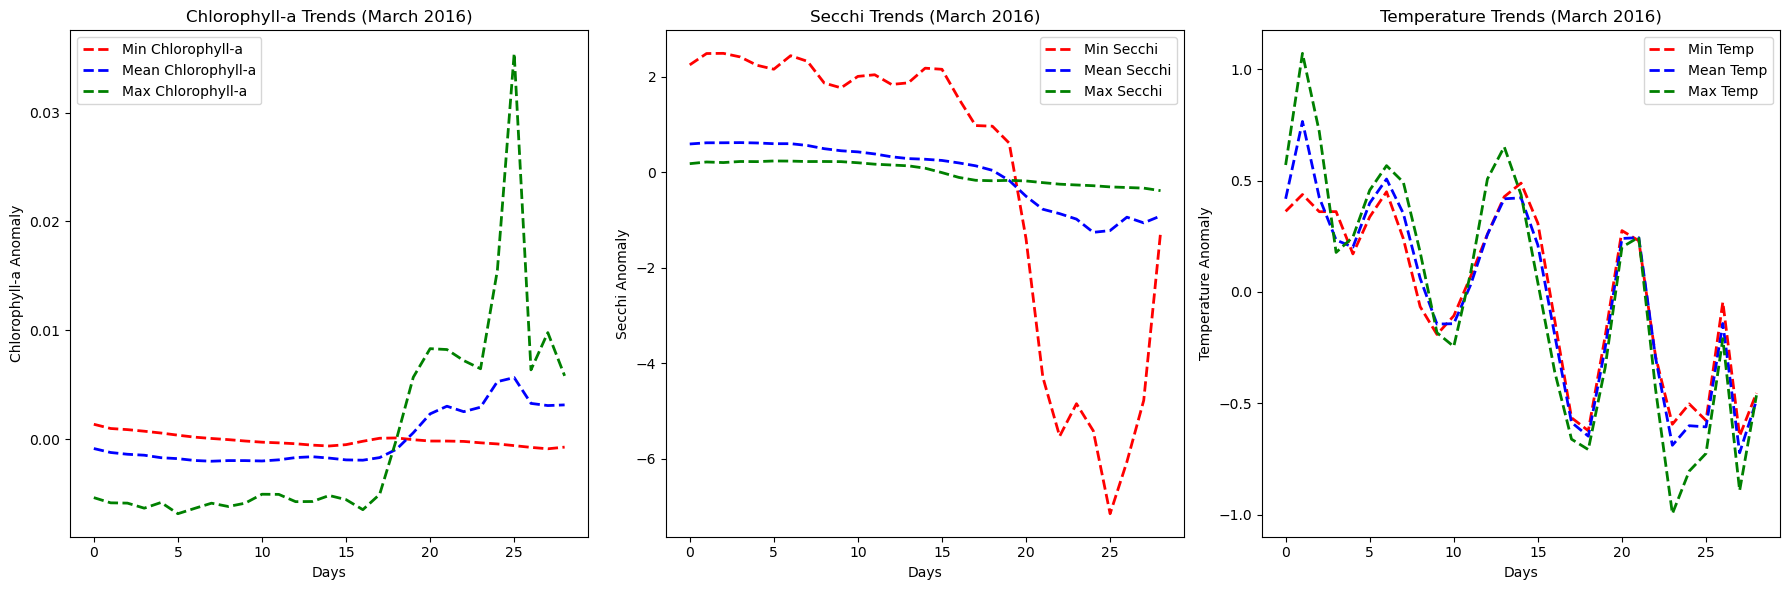

/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit =

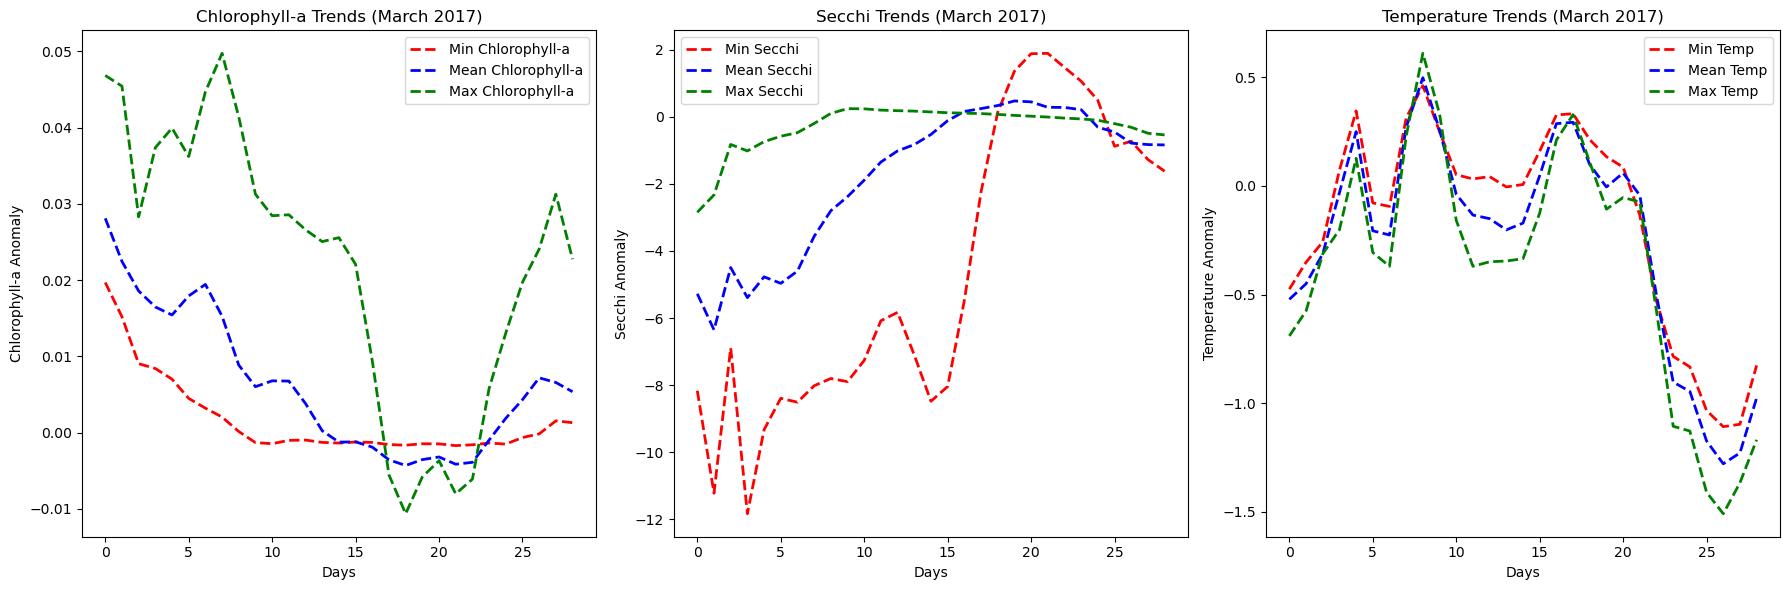

/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit = np.polyfit(xscatter[ind], yscatter[ind], deg=20)
/Users/liav/Desktop/Jupyter/plotMarch.py:286: RankWarning: Polyfit may be poorly conditioned
  fit =

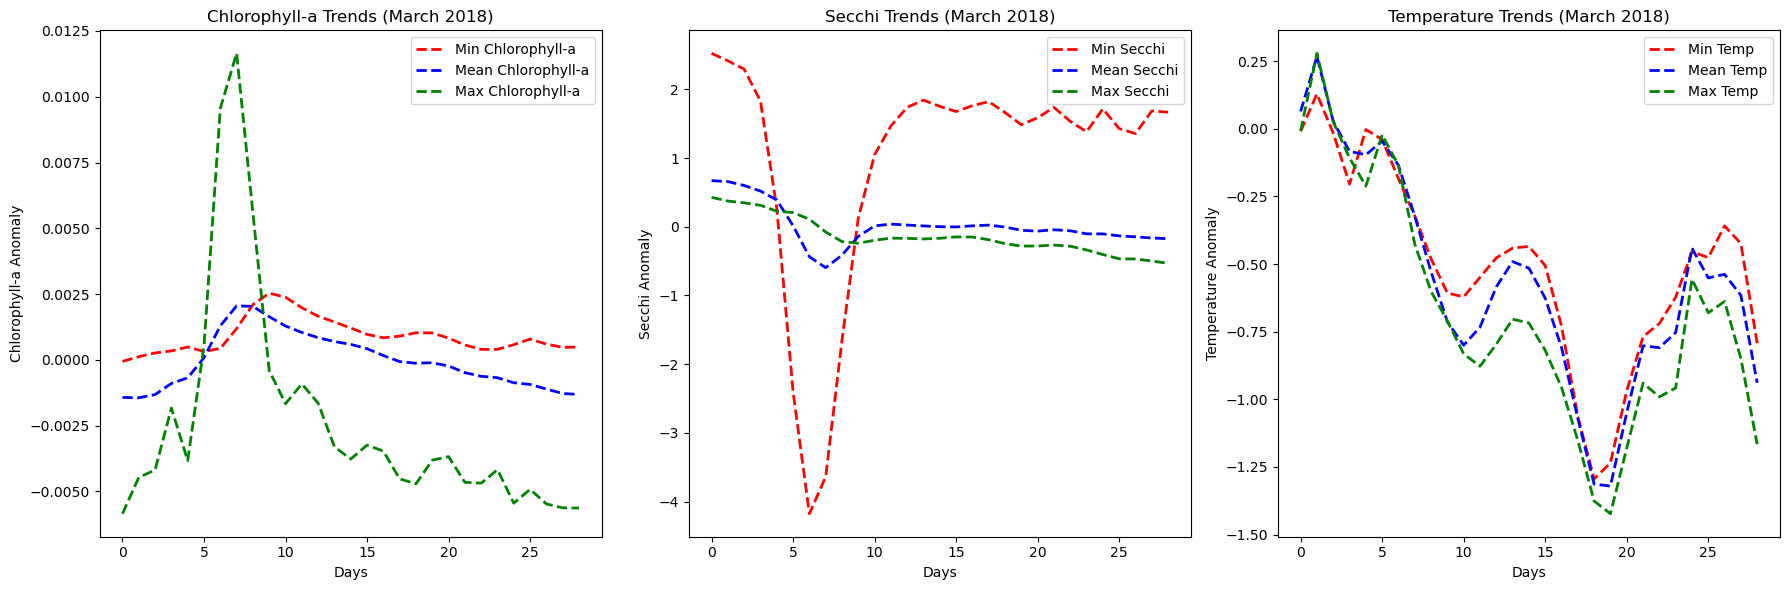

In [25]:
chl16 = extractInfo(new_norm_March2016, 'Chl')
se16 = extractInfo(new_norm_March2016, 'Secchi')
t16 = extractInfo(new_norm_March2016, 'temp')

tt.plot_data(chl16, se16, t16,'(March 2016)')

chl17 = extractInfo(new_norm_March2017, 'Chl')
se17 = extractInfo(new_norm_March2017, 'Secchi')
t17 = extractInfo(new_norm_March2017, 'temp')

tt.plot_data(chl17, se17, t17,'(March 2017)')

chl18 = extractInfo(new_norm_March2018, 'Chl')
se18 = extractInfo(new_norm_March2018, 'Secchi')
t18 = extractInfo(new_norm_March2018, 'temp')

tt.plot_data(chl18, se18, t18,'(March 2018)')